<a href="https://colab.research.google.com/github/MatDawit/AI4ALL/blob/yuwen-ver/Final_StartupSuccessPredictionCleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("/content/drive/MyDrive/AI4ALL/Final_Project/big_startup_secsees_dataset.csv")

df.head()

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
0,/organization/-fame,#fame,http://livfame.com,Media,10000000,operating,IND,16,Mumbai,Mumbai,1,NaN,2015-01-05,2015-01-05
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878,operating,NaN,NaN,NaN,NaN,1,NaN,2014-01-30,2014-01-30
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,-,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24


In [ ]:
print("Number of rows in the dataset:", len(df))

Number of rows in the dataset: 66368


# Simple Data Exploration
- seeing data types, number of null values
- simple statistics (mean, std, min, max, quartiles)
- numeric and categorical data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   permalink          66368 non-null  object
 1   name               66367 non-null  object
 2   homepage_url       61310 non-null  object
 3   category_list      63220 non-null  object
 4   funding_total_usd  66368 non-null  object
 5   status             66368 non-null  object
 6   country_code       59410 non-null  object
 7   state_code         57821 non-null  object
 8   region             58338 non-null  object
 9   city               58340 non-null  object
 10  funding_rounds     66368 non-null  int64 
 11  founded_at         51147 non-null  object
 12  first_funding_at   66344 non-null  object
 13  last_funding_at    66368 non-null  object
dtypes: int64(1), object(13)
memory usage: 7.1+ MB


In [ ]:
df.isna().sum()
# funding_total_used -> has - for null values, so not interpreted as NaN

,0
permalink,0
name,1
homepage_url,5058
category_list,3148
funding_total_usd,0
status,0
country_code,6958
state_code,8547
region,8030
city,8028


In [ ]:
df.describe()
# need to fix datatype for:
# - dates (founded at, first funding, last funding) -> datetime
# - funding_total_used -> int64

,funding_rounds
count,66368.000000
mean,1.732522
std,1.360251
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,19.000000


In [ ]:
df_with_numeric_features = df.select_dtypes(include=['int64'])
print("Numeric Columns:")
for col in df_with_numeric_features:
  print(col)

Numeric Columns:
funding_rounds


In [ ]:
df_with_non_numeric_features = df.select_dtypes(include=['object'])
print("Non-Numeric Columns:")
for col in df_with_non_numeric_features:
  print(col)

Non-Numeric Columns:
permalink
name
homepage_url
category_list
funding_total_usd
status
country_code
state_code
region
city
founded_at
first_funding_at
last_funding_at


# Remove Duplicates (doesn't exist) + Uneccessary Columns

In [ ]:
column_names = df.columns.tolist()
column_names

['permalink',
 'name',
 'homepage_url',
 'category_list',
 'funding_total_usd',
 'status',
 'country_code',
 'state_code',
 'region',
 'city',
 'funding_rounds',
 'founded_at',
 'first_funding_at',
 'last_funding_at']

In [ ]:
len(df)

66368

In [ ]:
df.drop_duplicates()
len(df) #no duplicates exist?

66368

In [ ]:
df.head()

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
0,/organization/-fame,#fame,http://livfame.com,Media,10000000,operating,IND,16,Mumbai,Mumbai,1,NaN,2015-01-05,2015-01-05
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878,operating,NaN,NaN,NaN,NaN,1,NaN,2014-01-30,2014-01-30
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,-,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24


In [ ]:
df = df.drop(['state_code', 'region', 'city'], axis='columns')
df = df.drop(['permalink', 'name', 'homepage_url'], axis='columns')

In [ ]:
df.head()

,category_list,funding_total_usd,status,country_code,funding_rounds,founded_at,first_funding_at,last_funding_at
0,Media,10000000,operating,IND,1,NaN,2015-01-05,2015-01-05
1,Application Platforms|Real Time|Social Network...,700000,operating,USA,2,2014-09-04,2014-03-01,2014-10-14
2,Apps|Games|Mobile,3406878,operating,NaN,1,NaN,2014-01-30,2014-01-30
3,Curated Web,2000000,operating,CHN,1,2007-01-01,2008-03-19,2008-03-19
4,Software,-,operating,USA,1,2010-01-01,2014-07-24,2014-07-24


In [ ]:
print("Number of distinct countries:")
distinct_countries = df['country_code'].value_counts()
len(distinct_countries)

Number of distinct countries:


137

In [ ]:
distinct_countries

,count
country_code,
USA,37601
GBR,3688
CAN,1925
IND,1596
CHN,1544
...,...
GRD,1
SOM,1
SYC,1


In [ ]:
df['category_list'].value_counts()

,count
category_list,
Software,3995
Biotechnology,3615
E-Commerce,1332
Mobile,1177
Clean Technology,1133
...,...
Design|Hardware + Software|Health and Wellness,1
Automotive|Data Security|Education|Kids|Portals|Public Relations,1
Mobile|Networking|Web Hosting,1


In [ ]:
df['status'].value_counts()

,count
status,
operating,53034
closed,6238
acquired,5549
ipo,1547


In [ ]:
df['funding_rounds'].value_counts()

,count
funding_rounds,
1,42472
2,12353
3,5606
4,2739
5,1468
6,774
7,418
8,214
9,126


# Fix Formatting/Data Types - Structural Errors

In [ ]:
df.head()

,category_list,funding_total_usd,status,country_code,funding_rounds,founded_at,first_funding_at,last_funding_at
0,Media,10000000,operating,IND,1,NaN,2015-01-05,2015-01-05
1,Application Platforms|Real Time|Social Network...,700000,operating,USA,2,2014-09-04,2014-03-01,2014-10-14
2,Apps|Games|Mobile,3406878,operating,NaN,1,NaN,2014-01-30,2014-01-30
3,Curated Web,2000000,operating,CHN,1,2007-01-01,2008-03-19,2008-03-19
4,Software,-,operating,USA,1,2010-01-01,2014-07-24,2014-07-24


In [ ]:
# convert non-numeric values to NaN -> handle NaN values then convert to int later
df['funding_total_usd'] = pd.to_numeric(df['funding_total_usd'], errors='coerce')
# df.astype({'funding_total_usd':'int64'})

In [ ]:
df['founded_at'] = pd.to_datetime(df['founded_at'], format='%Y-%m-%d', errors='coerce')
df['first_funding_at'] = pd.to_datetime(df['founded_at'], format='%Y-%m-%d', errors='coerce')
df['last_funding_at'] = pd.to_datetime(df['founded_at'], format='%Y-%m-%d', errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   category_list      63220 non-null  object        
 1   funding_total_usd  53583 non-null  float64       
 2   status             66368 non-null  object        
 3   country_code       59410 non-null  object        
 4   funding_rounds     66368 non-null  int64         
 5   founded_at         51143 non-null  datetime64[ns]
 6   first_funding_at   51143 non-null  datetime64[ns]
 7   last_funding_at    51143 non-null  datetime64[ns]
dtypes: datetime64[ns](3), float64(1), int64(1), object(3)
memory usage: 4.1+ MB


In [ ]:
df_with_numeric_features = df.select_dtypes(include=['float64', 'int64'])

In [ ]:
df_with_numeric_features.describe()

,funding_total_usd,funding_rounds
count,5.358300e+04,66368.000000
mean,1.847860e+07,1.732522
std,1.880133e+08,1.360251
min,1.000000e+00,1.000000
25%,3.356235e+05,1.000000
50%,2.000000e+06,1.000000
75%,1.000000e+07,2.000000
max,3.007950e+10,19.000000


In [ ]:
df_with_dates = df.select_dtypes(include='datetime')
for col in df_with_dates:
  print(col)

founded_at
first_funding_at
last_funding_at


In [ ]:
df_with_dates.describe()

,founded_at,first_funding_at,last_funding_at
count,51143,51143,51143
mean,2007-12-25 07:34:57.014254080,2007-12-25 07:34:57.014254080,2007-12-25 07:34:57.014254080
min,1749-01-01 00:00:00,1749-01-01 00:00:00,1749-01-01 00:00:00
25%,2006-01-01 00:00:00,2006-01-01 00:00:00,2006-01-01 00:00:00
50%,2010-09-01 00:00:00,2010-09-01 00:00:00,2010-09-01 00:00:00
75%,2013-01-01 00:00:00,2013-01-01 00:00:00,2013-01-01 00:00:00
max,2105-02-17 00:00:00,2105-02-17 00:00:00,2105-02-17 00:00:00


In [ ]:
df['last_funding_at'].sort_values(ascending=False) #also strange for founded_at and first_funding_at

,last_funding_at
16681,2105-02-17
53396,2104-01-01
32736,2041-09-21
34438,2016-04-02
30842,2016-01-01
...,...
66351,NaT
66359,NaT
66360,NaT
66363,NaT


In [ ]:
#row 16681 and #53396 have strange dates -> drop?
df[16681:16682]

,category_list,funding_total_usd,status,country_code,funding_rounds,founded_at,first_funding_at,last_funding_at
16681,Fantasy Sports,100000.0,operating,NaN,1,2105-02-17,2105-02-17,2105-02-17


In [ ]:
df[53396:53397]

,category_list,funding_total_usd,status,country_code,funding_rounds,founded_at,first_funding_at,last_funding_at
53396,Creative Industries|Digital Media|Marketplaces,150000.0,operating,GBR,1,2104-01-01,2104-01-01,2104-01-01


In [ ]:
len(df)

66368

In [ ]:
# fix row index after drop later
df.drop([16681, 53396, 32736], axis=0, inplace=True)

In [ ]:
df['founded_at'].sort_values(ascending=False)

,founded_at
34438,2016-04-02
30842,2016-01-01
2927,2015-12-23
52909,2015-12-15
54391,2015-12-01
...,...
66351,NaT
66359,NaT
66360,NaT
66363,NaT


In [ ]:
df_with_dates = df.select_dtypes(include='datetime')
df_with_dates.describe()

,founded_at,first_funding_at,last_funding_at
count,51140,51140,51140
mean,2007-12-23 16:41:19.593273344,2007-12-23 16:41:19.593273344,2007-12-23 16:41:19.593273344
min,1749-01-01 00:00:00,1749-01-01 00:00:00,1749-01-01 00:00:00
25%,2006-01-01 00:00:00,2006-01-01 00:00:00,2006-01-01 00:00:00
50%,2010-09-01 00:00:00,2010-09-01 00:00:00,2010-09-01 00:00:00
75%,2013-01-01 00:00:00,2013-01-01 00:00:00,2013-01-01 00:00:00
max,2016-04-02 00:00:00,2016-04-02 00:00:00,2016-04-02 00:00:00


# Filter Outliers

**Considerations: ML model -> when to drop vs. not drop? (courtesy of ChatGPT)**
https://chatgpt.com/share/68530f89-d720-8008-9260-dcadcf8c028b
- drop: using models sensitive to scale (ex. linear regression, logistic regression)

---

- **don't** drop: using tree-based models (random forest, XGBoost), which handle outliers well
- **don't** drop: detect patterns in successful startups (big funding rounds/amount = strong indicators of success) -> strong correlation between high funding and success


**Additional considerations:**
- use boxplots/histograms to see outlier distribution
   - extremeness:
     - mild outliers = ok, natural variance
     - extreme outliers (10x, 100x) = bad, can distort model
   - frequency:
     - rare -> can remove
     - frequent - may be a skewed distribution/a useful signal/indicator
- compare ml model performance with and without outliers

In [ ]:
from scipy.stats import zscore

In [ ]:
features_considered = ['funding_total_usd', 'funding_rounds']
zscore_df = pd.DataFrame(zscore(df[features_considered], nan_policy='omit'), columns=features_considered)
zscore_df.head()

zscore_df.index = df.index # make sure index is consistent

**Boxplot: Outlier Distribution of Funding Amount**

Outliers calculated as:
- less than Q1 - 1.5IQR (left line)
- greater than Q3 + 1.5IQR (right line)

In [ ]:
df['funding_total_usd'].describe()

,funding_total_usd
count,5.358000e+04
mean,1.847963e+07
std,1.880185e+08
min,1.000000e+00
25%,3.360000e+05
50%,2.000000e+06
75%,1.000000e+07
max,3.007950e+10


<Axes: xlabel='funding_total_usd'>

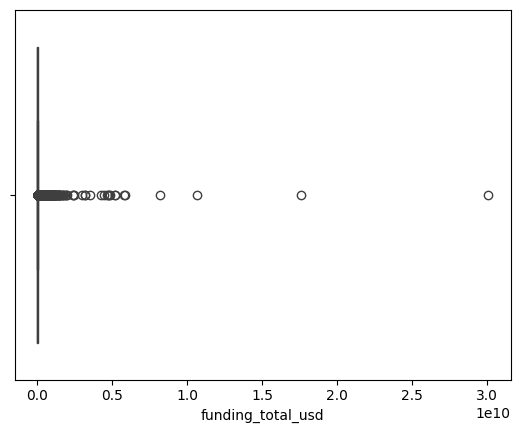

In [ ]:
sns.boxplot(x=df['funding_total_usd'])

Main concentrated area of funding


(0.0, 10000000.0)

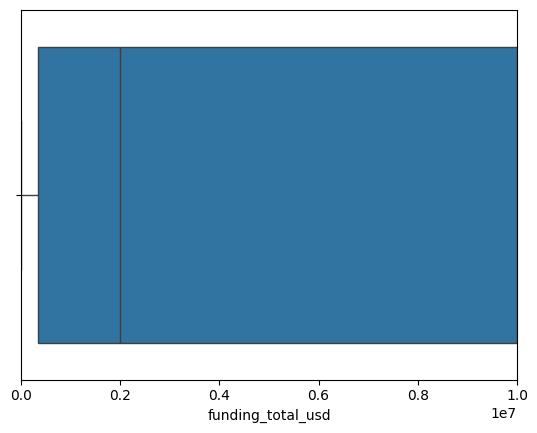

In [ ]:
print("Main concentrated area of funding")
boxplot = sns.boxplot(x=df['funding_total_usd'])
boxplot.set_xlim(0, 1*1e7) #1 x 10^7 USD
# 25th percentile: $300,000
# median: 0.2 x 10 ^ 7 = $ 2,000,000 -> $1,830,000
# 75th percentile: $9,000,000
# max (of this plot): 0.9 x 10^7 = $9,000,000
# actual max: $578,600,000

**Histogram: Distribution of Funding Amount**

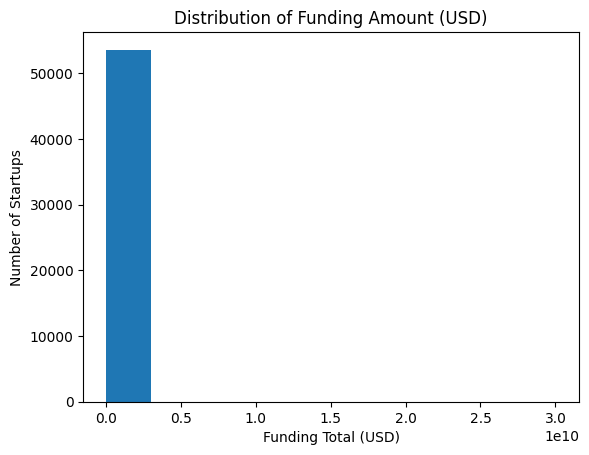

In [ ]:
plt.hist(df['funding_total_usd'])
plt.title("Distribution of Funding Amount (USD)")
plt.xlabel("Funding Total (USD)")
plt.ylabel("Number of Startups")
plt.show()

**Boxplot: Outlier Distribution of Funding Rounds**

- does more funding rounds -> more funding -> greater success?

Concentrated between 0 and 2 funding rounds


<Axes: xlabel='funding_rounds'>

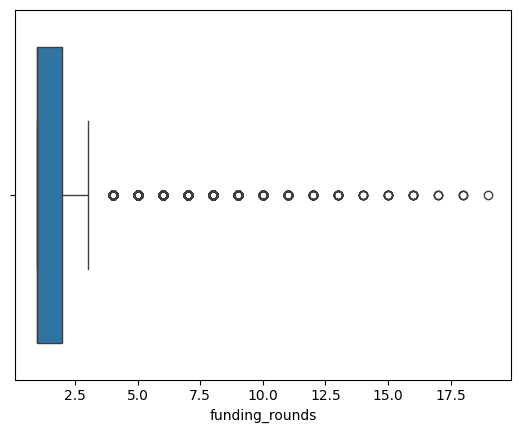

In [ ]:
print("Concentrated between 0 and 2 funding rounds")
sns.boxplot(x=df['funding_rounds'])

In [ ]:
filtered_rows = zscore_df['funding_total_usd'].isna() \
  | zscore_df['funding_rounds'].isna() \
  | (zscore_df.abs() < 3).all(axis = 1) \

filtered_rows.index = df.index # make sure index is consistent

print("Original length:", len(df))
print("Length of zscore df:", len(zscore_df))
print("Length of boolean mask:", len(filtered_rows))

Original length: 66365
Length of zscore df: 66365
Length of boolean mask: 66365


In [ ]:
print("Outliers present in dataset")
zscore_df[filtered_rows == False]

Outliers present in dataset


,funding_total_usd,funding_rounds
24,-0.062144,5.342678
53,-0.094064,3.137222
65,0.281732,5.342678
129,0.175662,3.872374
140,-0.018322,3.137222
...,...,...
66248,0.611423,4.607526
66297,1.191492,3.137222
66334,0.304603,4.607526
66344,0.245695,3.872374


In [ ]:
df_without_outliers = df[filtered_rows == True] #non-outliers
df_without_outliers

,category_list,funding_total_usd,status,country_code,funding_rounds,founded_at,first_funding_at,last_funding_at
0,Media,10000000.0,operating,IND,1,NaT,NaT,NaT
1,Application Platforms|Real Time|Social Network...,700000.0,operating,USA,2,2014-09-04,2014-09-04,2014-09-04
2,Apps|Games|Mobile,3406878.0,operating,NaN,1,NaT,NaT,NaT
3,Curated Web,2000000.0,operating,CHN,1,2007-01-01,2007-01-01,2007-01-01
4,Software,NaN,operating,USA,1,2010-01-01,2010-01-01,2010-01-01
...,...,...,...,...,...,...,...,...
66363,Enterprise Software,1587301.0,operating,CHN,1,NaT,NaT,NaT
66364,Advertising|Mobile|Web Development|Wireless,114304.0,operating,HRV,4,2012-05-13,2012-05-13,2012-05-13
66365,NaN,NaN,operating,NaN,1,2011-01-01,2011-01-01,2011-01-01
66366,Consumer Electronics|Internet of Things|Teleco...,18192.0,operating,USA,1,2014-01-01,2014-01-01,2014-01-01


Nearly all outlier startups (funding amount, funding rounds) are from the US or UK

In [ ]:
df[(zscore_df.abs() < 3).all(axis=1) == False]['country_code'].value_counts()

,count
country_code,
USA,7687
GBR,607
IND,430
DEU,423
CAN,380
...,...
VEN,1
TUN,1
GEO,1


In [ ]:
df = df_without_outliers.copy(deep=True)

# Handle Missing Values + Feature Engineering

## Preemptive Exploration

**Columns with missing values:**
1. (done) Dates - founded_at, first_funding_at, last_funding_at -> determine whether mean, median, or mode would be best to impute by distribution
2. (done) Category/Sector - fix category list formatting for ml training
3. Country code - check if state code, region code, etc. exists (probably not?)
3. Funding Amount - funding_total_usd - does mean/median funding differ by country code or category? which factor matters most?

In [ ]:
df.isna().sum()[df.isna().sum() > 0]

,0
category_list,3147
funding_total_usd,12785
country_code,6925
founded_at,15102
first_funding_at,15102
last_funding_at,15102


In [ ]:
print("Total number of rows:", len(df))

Total number of rows: 64559


**Do rows that have a NaN date have NaN for all 3 dates?**

-> strictly, yes

In [ ]:
rows_missing_foundingdate = df[df['founded_at'].notna() == False]
rowswith_alldates_missing = df[df['founded_at'].isna() & df['first_funding_at'].isna() & df['last_funding_at'].isna()]
print("Number of rows missing founding date:", len(rows_missing_foundingdate))
print("Number of rows missing all dates:", len(rowswith_alldates_missing))

Number of rows missing founding date: 15102
Number of rows missing all dates: 15102


**Do rows with missing total funding/country code also mostly have NaN for other values?**

-> no
  - I should impute them (retain other useful info)

In [ ]:
df[df['funding_total_usd'].isna()].head()

,category_list,funding_total_usd,status,country_code,funding_rounds,founded_at,first_funding_at,last_funding_at
4,Software,NaN,operating,USA,1,2010-01-01,2010-01-01,2010-01-01
10,Entertainment|Games|Software,NaN,operating,USA,1,NaT,NaT,NaT
11,Networking|Real Estate|Web Hosting,NaN,operating,USA,1,2013-12-07,2013-12-07,2013-12-07
12,Health and Wellness,NaN,operating,USA,1,1986-01-01,1986-01-01,1986-01-01
22,Beauty,NaN,operating,IND,1,2008-01-01,2008-01-01,2008-01-01


In [ ]:
df[df['country_code'].isna()].head()

,category_list,funding_total_usd,status,country_code,funding_rounds,founded_at,first_funding_at,last_funding_at
2,Apps|Games|Mobile,3406878.0,operating,NaN,1,NaT,NaT,NaT
21,Mobile,43923865.0,operating,NaN,1,2008-01-01,2008-01-01,2008-01-01
35,Coffee|Delivery|Subscription Service,100000.0,operating,NaN,1,2015-04-01,2015-04-01,2015-04-01
39,iOS|Mobile|Music,NaN,operating,NaN,2,2012-01-01,2012-01-01,2012-01-01
45,EdTech|Education,NaN,operating,NaN,1,NaT,NaT,NaT


In [ ]:
df[df['category_list'].isna()].head()

,category_list,funding_total_usd,status,country_code,funding_rounds,founded_at,first_funding_at,last_funding_at
56,NaN,13000000.0,operating,CHN,1,2014-01-01,2014-01-01,2014-01-01
71,NaN,NaN,operating,CHN,1,NaT,NaT,NaT
79,NaN,10000000.0,operating,NaN,1,2015-07-15,2015-07-15,2015-07-15
109,NaN,15000000.0,operating,CHN,1,2014-01-01,2014-01-01,2014-01-01
113,NaN,NaN,operating,USA,1,2011-01-01,2011-01-01,2011-01-01


## Filling in missing dates

**Check date distribution (graph) to determine best date to impute**

*I chose median bc a lot of outliers that are very skewed*

Fill in empty dates with a representative date:
- mean good for normally distributed dates, may not be best option -> could not filter out outliers for date
- median -> good if skewed/I want to be less affected by outliers
    - see distribution of dates
- mode -> if a lot of dates are repeated a lot/popular as funding date
    - see count of diff dates


I doubt that it is highly tied to category, country, or amount of funding in the large scheme of things, so filling with an average value makes sense

Quite skewed -> use median?


<Axes: xlabel='founded_at'>

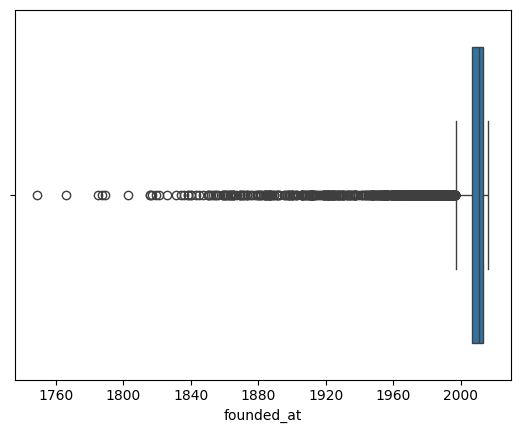

In [ ]:
print("Quite skewed -> use median?")
sns.boxplot(x=df['founded_at'])

**Add missing date indicator**
- for ml model - startups with missing records may be more likely to fail (not well documented)? or are older?

- check if all 3 are always missing together first to determine if:
  - i should only mark missing founding date
  - or missing date in general

In [ ]:
df['dates_missing_originally'] = df['founded_at'].isna()
# can do astype('int64') to convert to 0 for False, 1 for True

**Impute NaN dates with median date**

In [ ]:
df['founded_at'].describe()

,founded_at
count,49457
mean,2008-01-28 19:00:00.946276608
min,1749-01-01 00:00:00
25%,2006-07-10 00:00:00
50%,2010-12-01 00:00:00
75%,2013-01-01 00:00:00
max,2016-04-02 00:00:00


In [ ]:
df['founded_at'].median()

Timestamp('2010-12-01 00:00:00')

In [ ]:
df['first_funding_at'].median()

Timestamp('2010-12-01 00:00:00')

In [ ]:
df['last_funding_at'].median()

Timestamp('2010-12-01 00:00:00')

In [ ]:
df['founded_at'].fillna('2010-12-01 00:00:00', inplace=True)
df['first_funding_at'].fillna('2010-12-01 00:00:00', inplace=True)
df['last_funding_at'].fillna('2010-12-01 00:00:00', inplace=True)

/tmp/ipython-input-58-2565349621.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['founded_at'].fillna('2010-12-01 00:00:00', inplace=True)
/tmp/ipython-input-58-2565349621.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

In [ ]:
print("Remaining columns with missing values:")
NaN_columns = df.isna().sum()[df.isna().sum() > 0]
for col in NaN_columns.index:
  print(col)

NaN_columns.name = "Columns With Missing Values"

Remaining columns with missing values:
category_list
funding_total_usd
country_code


In [ ]:
NaN_columns

,Columns With Missing Values
category_list,3147
funding_total_usd,12785
country_code,6925


In [ ]:
percent_missing = (df.isna().sum()/len(df) * 100).round(2)[(df.isna().sum()/len(df) * 100).round(2) > 0]
percent_missing.name = "Percentage of Missing Values"
percent_missing
# df.shape[0] # number of rows
# df.shape[1] # number of columns

,Percentage of Missing Values
category_list,4.87
funding_total_usd,19.80
country_code,10.73


**Make new column for founding year**

In [ ]:
df['year'] = df['founded_at'].dt.year
df.head()

,category_list,funding_total_usd,status,country_code,funding_rounds,founded_at,first_funding_at,last_funding_at,dates_missing_originally,year
0,Media,10000000.0,operating,IND,1,2010-12-01,2010-12-01,2010-12-01,True,2010
1,Application Platforms|Real Time|Social Network...,700000.0,operating,USA,2,2014-09-04,2014-09-04,2014-09-04,False,2014
2,Apps|Games|Mobile,3406878.0,operating,NaN,1,2010-12-01,2010-12-01,2010-12-01,True,2010
3,Curated Web,2000000.0,operating,CHN,1,2007-01-01,2007-01-01,2007-01-01,False,2007
4,Software,NaN,operating,USA,1,2010-01-01,2010-01-01,2010-01-01,False,2010


## Dropping Missing + Restructuring Categories (<5%)

**Dropping Rows with Missing Category**

In [ ]:
df = df.dropna(subset=['category_list']).reset_index(drop=True)

In [ ]:
percent_missing = (df.isna().sum()/len(df) * 100).round(2)[(df.isna().sum()/len(df) * 100).round(2) > 0]
percent_missing.name = "Percentage of Missing Values"
percent_missing

,Percentage of Missing Values
funding_total_usd,17.23
country_code,8.77


**Splitting Category Labels into a List**

In [ ]:
df['category_list'] = df['category_list'].str.split('|')

In [ ]:
df.head()

,category_list,funding_total_usd,status,country_code,funding_rounds,founded_at,first_funding_at,last_funding_at,dates_missing_originally,year
0,[Media],10000000.0,operating,IND,1,2010-12-01,2010-12-01,2010-12-01,True,2010
1,"[Application Platforms, Real Time, Social Netw...",700000.0,operating,USA,2,2014-09-04,2014-09-04,2014-09-04,False,2014
2,"[Apps, Games, Mobile]",3406878.0,operating,NaN,1,2010-12-01,2010-12-01,2010-12-01,True,2010
3,[Curated Web],2000000.0,operating,CHN,1,2007-01-01,2007-01-01,2007-01-01,False,2007
4,[Software],NaN,operating,USA,1,2010-01-01,2010-01-01,2010-01-01,False,2010


## Imputing UNK for Missing Country Codes

In [ ]:
df['country_code'] = df['country_code'].fillna('UNK') # means unknown

In [ ]:
percent_missing = (df.isna().sum()/len(df) * 100).round(2)[(df.isna().sum()/len(df) * 100).round(2) > 0]
percent_missing.name = "Percentage of Missing Values"
percent_missing

,Percentage of Missing Values
funding_total_usd,17.23


## Imputing Missing Funding by Country



**Add indicator for missing funding**
- may be an indicator of early stage or failing startups

In [ ]:
df['funding_missing_originally'] = df['funding_total_usd'].isna()
df.head()

,category_list,funding_total_usd,status,country_code,funding_rounds,founded_at,first_funding_at,last_funding_at,dates_missing_originally,year,funding_missing_originally
0,[Media],10000000.0,operating,IND,1,2010-12-01,2010-12-01,2010-12-01,True,2010,False
1,"[Application Platforms, Real Time, Social Netw...",700000.0,operating,USA,2,2014-09-04,2014-09-04,2014-09-04,False,2014,False
2,"[Apps, Games, Mobile]",3406878.0,operating,UNK,1,2010-12-01,2010-12-01,2010-12-01,True,2010,False
3,[Curated Web],2000000.0,operating,CHN,1,2007-01-01,2007-01-01,2007-01-01,False,2007,False
4,[Software],NaN,operating,USA,1,2010-01-01,2010-01-01,2010-01-01,False,2010,True


**Impute with median funding from that country**

In [ ]:
df['funding_total_usd'] = df.groupby('country_code')['funding_total_usd'].transform(lambda x: x.fillna(x.median()) if not pd.isna(x.median()) else 0)

In [ ]:
df.head()

,category_list,funding_total_usd,status,country_code,funding_rounds,founded_at,first_funding_at,last_funding_at,dates_missing_originally,year,funding_missing_originally
0,[Media],10000000.0,operating,IND,1,2010-12-01,2010-12-01,2010-12-01,True,2010,False
1,"[Application Platforms, Real Time, Social Netw...",700000.0,operating,USA,2,2014-09-04,2014-09-04,2014-09-04,False,2014,False
2,"[Apps, Games, Mobile]",3406878.0,operating,UNK,1,2010-12-01,2010-12-01,2010-12-01,True,2010,False
3,[Curated Web],2000000.0,operating,CHN,1,2007-01-01,2007-01-01,2007-01-01,False,2007,False
4,[Software],2500000.0,operating,USA,1,2010-01-01,2010-01-01,2010-01-01,False,2010,True


In [ ]:
df.isna().sum()

,0
category_list,0
funding_total_usd,0
status,0
country_code,0
funding_rounds,0
founded_at,0
first_funding_at,0
last_funding_at,0
dates_missing_originally,0
year,0


# Seeing Correlation

**Trying Correlation Coefficient - funding rounds and funding amount**
- -1 to 1, indicates strong **LINEAR** (negative and positive)
- 0 means no correlation

In [ ]:
df['funding_total_usd'] = df['funding_total_usd'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61412 entries, 0 to 61411
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   category_list               61412 non-null  object        
 1   funding_total_usd           61412 non-null  int64         
 2   status                      61412 non-null  object        
 3   country_code                61412 non-null  object        
 4   funding_rounds              61412 non-null  int64         
 5   founded_at                  61412 non-null  datetime64[ns]
 6   first_funding_at            61412 non-null  datetime64[ns]
 7   last_funding_at             61412 non-null  datetime64[ns]
 8   dates_missing_originally    61412 non-null  bool          
 9   year                        61412 non-null  int32         
 10  funding_missing_originally  61412 non-null  bool          
dtypes: bool(2), datetime64[ns](3), int32(1), int64(2), obj

In [ ]:
numeric_features = df.select_dtypes(include=['int64'])
corr_matrix = numeric_features.corr()
corr_matrix
# quite weak correlation

,funding_total_usd,funding_rounds
funding_total_usd,1.000000,0.253464
funding_rounds,0.253464,1.000000


<Axes: >

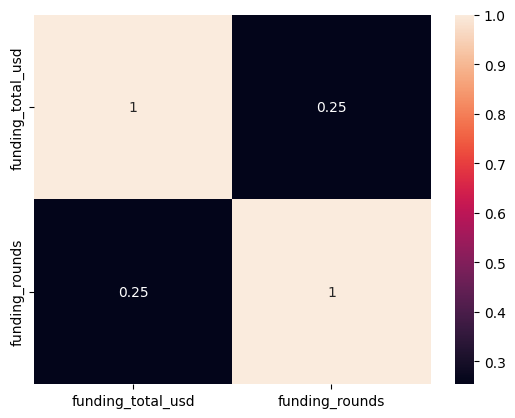

In [ ]:
# plt.figure(figsize= (15,15))
sns.heatmap(corr_matrix, annot=True)
# annot = True shows correlation coefficient inside heatmap
# produces heatmap where color intensity corresponds to magnitude of values

**Find numerical variables that have high correlation with output variable (funding_total_usd in my case)**

In [ ]:
high_corr_filter = corr_matrix['funding_total_usd'].abs() > 0.8
high_corr_filter
# boolean mask - variables with correlation > 0.8 are labeled True

,funding_total_usd
funding_total_usd,True
funding_rounds,False


In [ ]:
high_corr_vars = corr_matrix['funding_total_usd'][high_corr_filter].index.tolist()
print("Features with High Correlation to Total Funding (USD)")
high_corr_vars

Features with High Correlation to Total Funding (USD)


['funding_total_usd']

## Calculating Correlation between Early Indicators and Success/Funding Amount

In [ ]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder

country_le = LabelEncoder()

**Measuring Correlation between Country Code and Funding - via Mutual Info Regression** (categorical v. numerical)
- non-negative value, measures dependency between variable
- 0 = two random variables are independent
- higher values = higher dependency between two variable

In [ ]:
country_code = country_le.fit_transform(df['country_code'])
funding_total = df['funding_total_usd']
# assigns an integer label to each country

In [ ]:
country_code = country_code.reshape(-1, 1)
funding_total = np.array(funding_total).reshape(-1, 1)
#reshape(-1, 1) reshapes data into as many rows as needed to fit in 1 column
#needed for scikit-learn models
country_code

array([[ 54],
       [130],
       [128],
       ...,
       [ 51],
       [130],
       [128]])

In [ ]:
mi = mutual_info_regression(country_code, funding_total)
mi[0]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


np.float64(0.41792359698449744)

**Measuring Correlation between Country Code and Survival** (categorical v. numerical)
- highest correlation so far

In [ ]:
status = df['status']
np.array(status).reshape(-1, 1)
mi = mutual_info_classif(country_code, status, discrete_features='auto', random_state=0)
mi[0]

np.float64(0.024038336151643636)

**Measuring Correlation between Category and Funding**

**Measuring Correlation between Category and Survival**

**Founding Date v. Funding** (numerical v. numerical)

In [ ]:
founding_date = np.array(df['year']).reshape(-1, 1)
mi = mutual_info_regression(founding_date, funding_total)
mi[0]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


np.float64(0.10908545137472458)

**Founding Date v. Survival** (numerical v. categorical)

In [ ]:
mi = mutual_info_classif(founding_date, status, discrete_features='auto', random_state=0)
mi[0]

np.float64(0.05013417744109572)

#Convert categorical variables to numerical (encoding)

When to use each type:
- **one hot encoding** - few categories aka. low cardinality for that variable (ex. gender)
  - numerical models (linear models, logistic regression, SVMs, neural networks)
- **label encoding** - ordinal features (order matters, ex. education level: HS < BS < MS < PhD)
  - Tree-based models (ex. Random forest, XGBoost)
- **target encoding** - high cardinality (many categories) categorical variables with strong correlation to target (ex. zip code -> house price)
  - any model (but esp tree-based models, linear regression)
  - high risk of overfitting (replaces zip code w/ mean house price of that zip code)
- **frequency encoding** - high cardinality features, frequency is predictive of target
- **binary encoding** - high cardinality categorical features (compromise between one-hot + label encoding)


In [ ]:
non_numeric_features = df.select_dtypes(include=['object'])
print("Categorical Variables: ")
for col in non_numeric_features.columns.tolist():
  print(col)

Categorical Variables: 
category_list
status
country_code


**Encoding Status Ordinally**
- **I chose: ordinal** - good for ranking
- survival/not survival - binary classification may be better

In [ ]:
status_counts = df['status'].value_counts() #can encode ordinally ()

Over 80% of companies in the dataset have a status of operating - only 8% are closed, which is considered failed
### **- need to diversify data**

In [ ]:
pd.DataFrame((status_counts/len(df) * 100).round(2))

,count
status,
operating,80.92
closed,8.49
acquired,8.46
ipo,2.12


In [ ]:
# 0 for unsuccessful, 1 for successful (operating, acquired, ipo)
encode_status = {'closed': 0,
                 'operating': 1,
                 'acquired': 1,
                 'ipo': 1}

In [ ]:
df['status'] = df['status'].apply(lambda x: encode_status[x])

In [ ]:
df.head()

,category_list,funding_total_usd,status,country_code,funding_rounds,founded_at,first_funding_at,last_funding_at,dates_missing_originally,year,funding_missing_originally
0,[Media],10000000,1,IND,1,2010-12-01,2010-12-01,2010-12-01,True,2010,False
1,"[Application Platforms, Real Time, Social Netw...",700000,1,USA,2,2014-09-04,2014-09-04,2014-09-04,False,2014,False
2,"[Apps, Games, Mobile]",3406878,1,UNK,1,2010-12-01,2010-12-01,2010-12-01,True,2010,False
3,[Curated Web],2000000,1,CHN,1,2007-01-01,2007-01-01,2007-01-01,False,2007,False
4,[Software],2500000,1,USA,1,2010-01-01,2010-01-01,2010-01-01,False,2010,True


**Label Encoding Country Code**

**try to find correlation between country code and survival, or country code and funding amount**
**try to find correlation between category and survival, funding amount**

- only 1/2 (~60 countries/137) distinct countries have >20 rows
- only 1/4 (~30/120+) countries have >100 rows
-------
- label encoding - better for Tree-based models (ex. Random Forest, XGBoost)
- one hot encoding - better for linear models
- one hot encoding (0/1) would lead to a lot of empty columns

In [ ]:
len(df['country_code'].value_counts())

137

In [ ]:
df['country_code'].value_counts()[df['country_code'].value_counts() > 20] #use one hot encoding

,count
country_code,
USA,35140
UNK,5384
GBR,3543
CAN,1841
IND,1537
...,...
JOR,30
SVK,29
ISL,23


Label Encoding

In [ ]:
df['country_code'] = country_le.fit_transform(df['country_code'])

do frequency encoding if model gets confused by order of country code (linear regression, distance based - ex. knn, svm)

**Encoding Startup Categories - via frequency encoding**

why this works: https://chatgpt.com/share/68546d70-5670-8008-8a7c-2102ff33f538

intuitively: more frequenty/popular categories are likely popular due to being more successful
mainstream vs. rare

helps aggregate multiple industries/categories

There are 858 unique categories

In [ ]:
df_exp_categories = df.explode('category_list')
# duplicate row for each element in category list
df_exp_categories

,category_list,funding_total_usd,status,country_code,funding_rounds,founded_at,first_funding_at,last_funding_at,dates_missing_originally,year,funding_missing_originally
0,Media,10000000,1,54,1,2010-12-01,2010-12-01,2010-12-01,True,2010,False
1,Application Platforms,700000,1,130,2,2014-09-04,2014-09-04,2014-09-04,False,2014,False
1,Real Time,700000,1,130,2,2014-09-04,2014-09-04,2014-09-04,False,2014,False
1,Social Network Media,700000,1,130,2,2014-09-04,2014-09-04,2014-09-04,False,2014,False
2,Apps,3406878,1,128,1,2010-12-01,2010-12-01,2010-12-01,True,2010,False
...,...,...,...,...,...,...,...,...,...,...,...
61410,Internet of Things,18192,1,130,1,2014-01-01,2014-01-01,2014-01-01,False,2014,False
61410,Telecommunications,18192,1,130,1,2014-01-01,2014-01-01,2014-01-01,False,2014,False
61411,Consumer Goods,14851,1,128,1,2010-12-01,2010-12-01,2010-12-01,True,2010,False
61411,E-Commerce,14851,1,128,1,2010-12-01,2010-12-01,2010-12-01,True,2010,False


In [ ]:
df_exp_categories['category_list'].value_counts()

,count
category_list,
Software,8494
Mobile,5362
Biotechnology,4242
E-Commerce,4051
Curated Web,2964
...,...
First Aid,1
Notebooks,1
TV Station,1


In [ ]:
len(df_exp_categories)

147986

Category Frequency Encoding

In [ ]:
df_exp_freq = df_exp_categories['category_list'].value_counts()/len(df)
#normalize = True results in relative frequency
df_exp_freq

,count
category_list,
Software,0.138312
Mobile,0.087312
Biotechnology,0.069074
E-Commerce,0.065964
Curated Web,0.048264
...,...
First Aid,0.000016
Notebooks,0.000016
TV Station,0.000016


In [ ]:
df_exp_categories['category_freq'] = df_exp_categories['category_list'].map(df_exp_freq)
df_exp_categories

,category_list,funding_total_usd,status,country_code,funding_rounds,founded_at,first_funding_at,last_funding_at,dates_missing_originally,year,funding_missing_originally,category_freq
0,Media,10000000,1,54,1,2010-12-01,2010-12-01,2010-12-01,True,2010,False,0.013190
1,Application Platforms,700000,1,130,2,2014-09-04,2014-09-04,2014-09-04,False,2014,False,0.004120
1,Real Time,700000,1,130,2,2014-09-04,2014-09-04,2014-09-04,False,2014,False,0.005976
1,Social Network Media,700000,1,130,2,2014-09-04,2014-09-04,2014-09-04,False,2014,False,0.013629
2,Apps,3406878,1,128,1,2010-12-01,2010-12-01,2010-12-01,True,2010,False,0.029896
...,...,...,...,...,...,...,...,...,...,...,...,...
61410,Internet of Things,18192,1,130,1,2014-01-01,2014-01-01,2014-01-01,False,2014,False,0.007442
61410,Telecommunications,18192,1,130,1,2014-01-01,2014-01-01,2014-01-01,False,2014,False,0.007832
61411,Consumer Goods,14851,1,128,1,2010-12-01,2010-12-01,2010-12-01,True,2010,False,0.006579
61411,E-Commerce,14851,1,128,1,2010-12-01,2010-12-01,2010-12-01,True,2010,False,0.065964


In [ ]:
df['category_freq_avg'] = df_exp_categories.groupby(df_exp_categories.index)['category_freq'].mean()
df['category_freq_avg_percent'] = df['category_freq_avg'] * 100
df

,category_list,funding_total_usd,status,country_code,funding_rounds,founded_at,first_funding_at,last_funding_at,dates_missing_originally,year,funding_missing_originally,category_freq_avg,category_freq_avg_percent
0,[Media],10000000,1,54,1,2010-12-01,2010-12-01,2010-12-01,True,2010,False,0.013190,1.318960
1,"[Application Platforms, Real Time, Social Netw...",700000,1,130,2,2014-09-04,2014-09-04,2014-09-04,False,2014,False,0.007908,0.790833
2,"[Apps, Games, Mobile]",3406878,1,128,1,2010-12-01,2010-12-01,2010-12-01,True,2010,False,0.051271,5.127120
3,[Curated Web],2000000,1,23,1,2007-01-01,2007-01-01,2007-01-01,False,2007,False,0.048264,4.826418
4,[Software],2500000,1,130,1,2010-01-01,2010-01-01,2010-01-01,False,2010,True,0.138312,13.831173
...,...,...,...,...,...,...,...,...,...,...,...,...,...
61407,"[Analytics, Android, Developer APIs, Education...",1120000,1,42,3,2014-01-28,2014-01-28,2014-01-28,False,2014,False,0.013553,1.355327
61408,[Enterprise Software],1587301,1,23,1,2010-12-01,2010-12-01,2010-12-01,True,2010,False,0.041393,4.139256
61409,"[Advertising, Mobile, Web Development, Wireless]",114304,1,51,4,2012-05-13,2012-05-13,2012-05-13,False,2012,False,0.035360,3.535954
61410,"[Consumer Electronics, Internet of Things, Tel...",18192,1,130,1,2014-01-01,2014-01-01,2014-01-01,False,2014,False,0.007545,0.754467


Categories with Highest Median Funding

In [ ]:
# used median for less skew by outliers
category_funding = df_exp_categories.groupby('category_list')['funding_total_usd'].median()
category_funding.sort_values(ascending=False).head(10)

,funding_total_usd
category_list,
Anything Capital Intensive,212511000.0
Hi Tech,39490625.0
Biotechnology and Semiconductor,18683339.0
Communications Hardware,16000000.0
Optical Communications,15786363.5
Virtual Desktop,14625000.0
Data Center Infrastructure,13950000.0
Timeshares,13800000.0
Baby Boomers,11843499.0


# Other:

In [ ]:
df.head()

,category_list,funding_total_usd,status,country_code,funding_rounds,founded_at,first_funding_at,last_funding_at,dates_missing_originally,year,funding_missing_originally,category_freq_avg,category_freq_avg_percent
0,[Media],10000000,1,54,1,2010-12-01,2010-12-01,2010-12-01,True,2010,False,0.013190,1.318960
1,"[Application Platforms, Real Time, Social Netw...",700000,1,130,2,2014-09-04,2014-09-04,2014-09-04,False,2014,False,0.007908,0.790833
2,"[Apps, Games, Mobile]",3406878,1,128,1,2010-12-01,2010-12-01,2010-12-01,True,2010,False,0.051271,5.127120
3,[Curated Web],2000000,1,23,1,2007-01-01,2007-01-01,2007-01-01,False,2007,False,0.048264,4.826418
4,[Software],2500000,1,130,1,2010-01-01,2010-01-01,2010-01-01,False,2010,True,0.138312,13.831173


**Model -** predict funding amount and status by:
- category
- funding rounds
- country code
- founding date, first funding date

- Convert categorical -> numerical    
    - industry, then see correlation
    - (done) operating status
    - (done) country code
- **See what CATEGORICAL feature is most highly correlated** with operating/not operating? Or funding rounds/amount
   - country code is highly correlated with funding amount
   - already found that funding rounds have a weak linear relationship with funding amount
- see location, total funding amount, category, founding date of unsuccessful startups

**Additional features to consider:**
- (done) founding year as its own feature (does founding year or month matter more in market)
- check number of unique categories? - consider keeping only top 30 most frequent if too many (MANY like 387 or smth...?)
- check number of unique countries (>100)

todo:
- do some graphs on
  - relationship between total funding and category?
  - relationship between founding date and funding
      - funding date and operating status
  - relationship between location (country code) and funding
      - funding location and operating status
- other
  - distribution of funding, funding rounds
  - operating vs closed etc. bar chart
  - distribution of country
- reformat dates -> maybe only preserve the year, etc. whatever works best for ml training
- reformat category list for ml training